In [2]:
import re
import pandas as pd
import numpy as np
#from sklearn.preprocessing import LabelEncoder
#from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
import nltk

In [37]:
seq_length = 35

In [38]:
train_sentences = pd.read_csv("../data/dataset_mr/Trainset_complete.csv", sep=';') 
test_sentences = pd.read_csv("../data/dataset_mr/Testset.csv", sep=';')
val_sentences = pd.read_csv("../data/dataset_mr/Validationset.csv", sep=';')

In [39]:
# Für Sentimentanalyse zählen nur Wörter  
def keep_only_letters(text):
    text=re.sub(r'[^a-zA-Z\s]','',text)
    return text
 
# Groß- und Kleinschreibung egal 
def convert_to_lowercase(text):
    return text.lower()
 
def clean_reviews(text):
    text = keep_only_letters(text)
    text = convert_to_lowercase(text)
    return text

train_sentences['Phrase'] = train_sentences['Phrase'].apply(clean_reviews)
# test_set['Phrase'] = test_set['Phrase'].apply(clean_reviews)

In [40]:
train_labels = train_sentences['Sentiment'].values
train_reviews = train_sentences['Phrase'].values

test_labels = test_sentences['Sentiment'].values
test_reviews = test_sentences['Phrase'].values

val_labels = val_sentences['Sentiment'].values
val_reviews = val_sentences['Phrase'].values
print ('Number of reviews :', len(train_reviews))

Number of reviews : 8088


In [41]:
from collections import Counter
all_text2 = ' '.join(train_reviews)
# create a list of words
words = all_text2.split()
# Count all the words using Counter Method
count_words = Counter(words)

total_words = len(words)
sorted_words = count_words.most_common(total_words)

In [42]:
print (count_words)

Counter({'the': 6742, 'a': 4866, 'and': 4029, 'of': 3955, 'to': 2864, 's': 2407, 'is': 2404, 'it': 2306, 'that': 1774, 'in': 1734, 'but': 1198, 'as': 1197, 'with': 1069, 'film': 1039, 'for': 969, 'movie': 930, 'this': 922, 'its': 877, 'an': 859, 'you': 817, 'nt': 654, 'be': 611, 'not': 606, 'on': 593, 'one': 537, 'by': 521, 'about': 519, 'more': 515, 'are': 504, 'has': 469, 'from': 465, 'like': 458, 'than': 445, 'all': 443, 'have': 442, 'at': 442, 'i': 400, 'his': 400, 'so': 382, 'lrb': 358, 'rrb': 358, 'if': 351, 'what': 341, 'or': 339, 'story': 327, 'there': 326, 'who': 311, 'too': 302, 'does': 293, 'just': 293, 'out': 268, 'into': 258, 'much': 257, 'good': 256, 'up': 253, 'can': 250, 'most': 249, 'some': 239, 'no': 237, 'comedy': 231, 'even': 229, 'will': 226, 'he': 223, 'characters': 217, 'only': 215, 'little': 208, 'time': 205, 'their': 198, 'very': 198, 'funny': 198, 'make': 193, 'do': 193, 'may': 191, 'your': 190, 'way': 189, 'never': 189, 'would': 189, 'they': 183, 'which': 181

In [43]:
#vocab_to_int = {w:i for i, (w,c) in enumerate(sorted_words)}
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}
print (vocab_to_int)

{'the': 1, 'a': 2, 'and': 3, 'of': 4, 'to': 5, 's': 6, 'is': 7, 'it': 8, 'that': 9, 'in': 10, 'but': 11, 'as': 12, 'with': 13, 'film': 14, 'for': 15, 'movie': 16, 'this': 17, 'its': 18, 'an': 19, 'you': 20, 'nt': 21, 'be': 22, 'not': 23, 'on': 24, 'one': 25, 'by': 26, 'about': 27, 'more': 28, 'are': 29, 'has': 30, 'from': 31, 'like': 32, 'than': 33, 'all': 34, 'have': 35, 'at': 36, 'i': 37, 'his': 38, 'so': 39, 'lrb': 40, 'rrb': 41, 'if': 42, 'what': 43, 'or': 44, 'story': 45, 'there': 46, 'who': 47, 'too': 48, 'does': 49, 'just': 50, 'out': 51, 'into': 52, 'much': 53, 'good': 54, 'up': 55, 'can': 56, 'most': 57, 'some': 58, 'no': 59, 'comedy': 60, 'even': 61, 'will': 62, 'he': 63, 'characters': 64, 'only': 65, 'little': 66, 'time': 67, 'their': 68, 'very': 69, 'funny': 70, 'make': 71, 'do': 72, 'may': 73, 'your': 74, 'way': 75, 'never': 76, 'would': 77, 'they': 78, 'which': 79, 'was': 80, 'enough': 81, 'been': 82, 'we': 83, 'any': 84, 'makes': 85, 'love': 86, 'when': 87, 'work': 88, '

In [44]:
# create an encoding of reviews (replace words in our reviews by integers)
reviews_int = []
for review in train_reviews:
    r = [vocab_to_int[w] for w in review.split()]
    reviews_int.append(r)
print (reviews_int[0:3])

[[2, 5509, 1169, 4141, 4, 476], [1, 14, 30, 1, 8366, 147, 4, 2, 8367, 580, 258, 1580, 581, 8368, 8369, 2750, 3, 724, 13, 2317, 180, 3, 1282, 5510], [11, 8, 30, 19, 2318, 5, 252, 110, 27, 18, 1073, 11, 23, 2, 3331]]


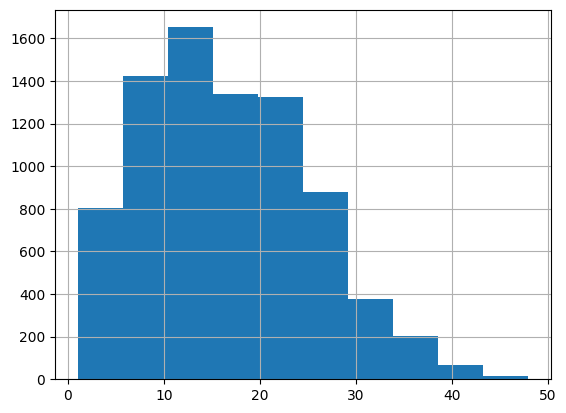

count    8087.000000
mean       16.658835
std         8.710175
min         1.000000
25%        10.000000
50%        16.000000
75%        23.000000
max        48.000000
dtype: float64

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
reviews_len = [len(x) for x in reviews_int]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()

In [83]:
# Removing Outliers — Getting rid of extremely long or short reviews
encoded_labels = np.array(train_labels)
reviews_len = len(encoded_labels)
#reviews_int = [ reviews_int[i] for i, l in enumerate(reviews_len) if l>0 ]
#encoded_labels = [ encoded_labels[i] for i, l in enumerate(reviews_len) if l> 0 ]

In [82]:
def pad_features(reviews_int, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    '''
    features = np.zeros((len(reviews_int), seq_length), dtype = int)
    
    for i, review in enumerate(reviews_int):
        review_len = len(review)
        
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = zeroes+review
        elif review_len > seq_length:
            new = review[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features
features = pad_features(reviews_int, seq_length)
print (features[:10,:])


[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    2 5509 1169 4141    4  476]
 [   0    0    0    0    0    0    0    0    0    0    0    1   14   30
     1 8366  147    4    2 8367  580  258 1580  581 8368 8369 2750    3
   724   13 2317  180    3 1282 5510]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0   11    8   30   19 2318    5  252  110
    27   18 1073   11   23    2 3331]
 [   0    0    0   78 5511   68  148  356   21  582  137   15    2 2751
  1170  583 2752 2753   39   78 5512   51    1 1074 4142  395    4 5513
  1171    3 4143  232   10 5514 2754]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0   71  823    6  116  555  300]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0  

In [84]:
split_frac = 0.8
len_feat = len(features)
train_x = features[0:int(split_frac*len_feat)]
train_y = encoded_labels[0:int(split_frac*len_feat)]
remaining_x = features[int(split_frac*len_feat):]
remaining_y = encoded_labels[int(split_frac*len_feat):]
valid_x = remaining_x[0:int(len(remaining_x)*0.5)]
valid_y = remaining_y[0:int(len(remaining_y)*0.5)]
test_x = remaining_x[int(len(remaining_x)*0.5):]
test_y = remaining_y[int(len(remaining_y)*0.5):]

In [85]:
import torch
from torch.utils.data import DataLoader, TensorDataset
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))
#test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

# dataloaders
batch_size = 50

# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
#test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [87]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = next(dataiter)
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([50, 35])
Sample input: 
 tensor([[   0,    0,    0,  ...,    6,  264,  178],
        [   0,    0,    0,  ...,    7,    2, 1281],
        [   0,    0,    0,  ...,   14, 6722,  731],
        ...,
        [   0,    0,    0,  ...,    0, 1004,  126],
        [   0,    0,    0,  ...,    4,  572, 2019],
        [   0,    0,    0,  ...,   58, 1804, 7631]], dtype=torch.int32)

Sample label size:  torch.Size([50])
Sample label: 
 tensor([ 0,  1,  1,  1,  0, -1,  0,  0,  0,  1,  0, -1,  1, -1,  1, -1, -1,  0,
        -1,  0,  1,  0,  0, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  0,
         1,  1,  1, -1,  0,  0, -1, -1,  1,  0,  0,  0,  1,  1])


In [88]:
import torch.nn as nn

class SentimentLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super().__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

In [89]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2
net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)

SentimentLSTM(
  (embedding): Embedding(13857, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [90]:
# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)


# training params

epochs = 4 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping
train_on_gpu = False

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        inputs = inputs.type(torch.LongTensor)
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                if(train_on_gpu):
                    inputs, labels = inputs.cuda(), labels.cuda()

                inputs = inputs.type(torch.LongTensor)
                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

RuntimeError: Expected hidden[0] size (2, 9, 256), got [2, 50, 256]

In [ ]:
# Get test data loss and accuracy

test_losses = [] # track loss
num_correct = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()
    
    # get predicted outputs
    inputs = inputs.type(torch.LongTensor)
    output, h = net(inputs, h)
    
    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer
    
    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)


# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))